In [1]:
import json
import numpy as np
import pandas as pd
from core import in_CI
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import spearmanr, pearsonr

/home/bakirillov/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## geCRISPR

#### RNN

In [2]:
with open("../models/geCRISPR/rnn_mse.json", "r") as ih:
    rnn_mse = json.load(ih)
with open("../models/geCRISPR/rnn_elbo.json", "r") as ih:
    rnn_elbo = json.load(ih)

In [3]:
in_CI(rnn_mse["y"], rnn_mse["y_hat"], rnn_mse["y_hat_std"]).mean()

0.68     0.955769
0.95     1.000000
0.997    1.000000
dtype: float64

In [4]:
in_CI(rnn_elbo["y"], rnn_elbo["y_hat"], rnn_elbo["y_hat_std"]).mean()

0.68     0.917308
0.95     1.000000
0.997    1.000000
dtype: float64

In [5]:
pearsonr(rnn_mse["y"], rnn_mse["y_hat"]), pearsonr(rnn_elbo["y"], rnn_elbo["y_hat"])

((0.576967895209178, 1.7724198720574054e-47),
 (0.1038527570883813, 0.01784026700310742))

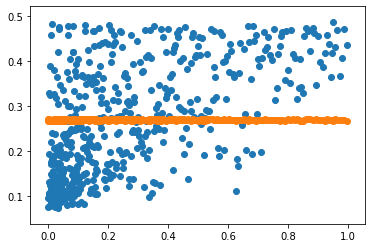

In [6]:
plt.scatter(rnn_mse["y"], rnn_mse["y_hat"])
plt.scatter(rnn_elbo["y"], rnn_elbo["y_hat"])

#### CNN

In [7]:
with open("../models/geCRISPR/cnn_mse.json", "r") as ih:
    cnn_mse = json.load(ih)
with open("../models/geCRISPR/cnn_elbo.json", "r") as ih:
    cnn_elbo = json.load(ih)

In [8]:
in_CI(cnn_mse["y"], cnn_mse["y_hat"], cnn_mse["y_hat_std"]).mean()

0.68     0.955769
0.95     1.000000
0.997    1.000000
dtype: float64

In [9]:
in_CI(cnn_elbo["y"], cnn_elbo["y_hat"], cnn_elbo["y_hat_std"]).mean()

0.68     0.961538
0.95     1.000000
0.997    1.000000
dtype: float64

In [10]:
pearsonr(cnn_mse["y"], cnn_mse["y_hat"]), pearsonr(cnn_elbo["y"], cnn_elbo["y_hat"])

((0.6040731690784618, 4.981537552749671e-53),
 (0.6263830304578959, 5.1480574361661186e-58))

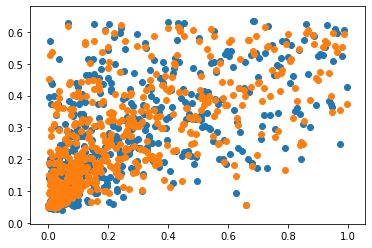

In [11]:
plt.scatter(cnn_mse["y"], cnn_mse["y_hat"])
plt.scatter(cnn_elbo["y"], cnn_elbo["y_hat"])

#### RNN+CNN

In [12]:
y_hats_mse = (np.array(rnn_mse["y_hat"])+np.array(cnn_mse["y_hat"]))/2
y_hats_elbo = (np.array(rnn_elbo["y_hat"])+np.array(cnn_elbo["y_hat"]))/2
y_hats_std_mse = (np.array(rnn_mse["y_hat_std"])+np.array(cnn_mse["y_hat_std"]))/2
y_hats_std_elbo = (np.array(rnn_elbo["y_hat_std"])+np.array(cnn_elbo["y_hat_std"]))/2

In [13]:
in_CI(cnn_mse["y"], y_hats_mse, y_hats_std_mse).mean()

0.68     0.961538
0.95     1.000000
0.997    1.000000
dtype: float64

In [14]:
in_CI(cnn_elbo["y"], y_hats_elbo, y_hats_std_elbo).mean()

0.68     0.944231
0.95     1.000000
0.997    1.000000
dtype: float64

In [15]:
spearmanr(cnn_mse["y"], y_hats_mse), spearmanr(cnn_elbo["y"], y_hats_elbo)

(SpearmanrResult(correlation=0.6716777514254574, pvalue=1.7166797060315981e-69),
 SpearmanrResult(correlation=0.6683281714457864, pvalue=1.4222468021944443e-68))

In [16]:
pearsonr(cnn_mse["y"], y_hats_mse), pearsonr(cnn_elbo["y"], y_hats_elbo)

((0.6259192713108139, 6.598078609095222e-58),
 (0.6261310247373961, 5.891558266002017e-58))

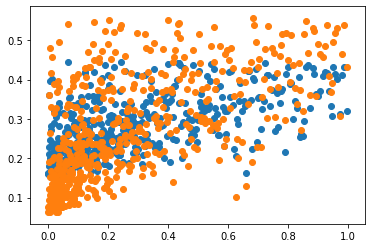

In [17]:
plt.scatter(cnn_elbo["y"], y_hats_elbo)
plt.scatter(cnn_mse["y"], y_hats_mse)

## DeepHF data

## WT

#### RNN

In [18]:
with open("../models/DeepHF/Wt/rnn_mse.json", "r") as ih:
    rnn_mse = json.load(ih)
with open("../models/DeepHF/Wt/rnn_elbo.json", "r") as ih:
    rnn_elbo = json.load(ih)

In [19]:
in_CI(rnn_mse["y"], rnn_mse["y_hat"], rnn_mse["y_hat_std"]).mean()

0.68     0.753477
0.95     0.942206
0.997    0.983453
dtype: float64

In [20]:
in_CI(rnn_elbo["y"], rnn_elbo["y_hat"], rnn_elbo["y_hat_std"]).mean()

0.68     0.774101
0.95     0.952158
0.997    0.986691
dtype: float64

In [21]:
pearsonr(rnn_mse["y"], rnn_mse["y_hat"]), pearsonr(rnn_elbo["y"], rnn_elbo["y_hat"])

((0.8750562348229244, 0.0), (0.8679364080865297, 0.0))

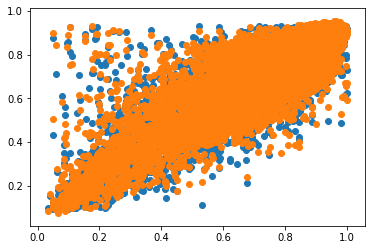

In [22]:
plt.scatter(rnn_mse["y"], rnn_mse["y_hat"])
plt.scatter(rnn_elbo["y"], rnn_elbo["y_hat"])

#### CNN

In [23]:
with open("../models/DeepHF/Wt/cnn_mse.json", "r") as ih:
    cnn_mse = json.load(ih)
with open("../models/DeepHF/Wt/cnn_elbo.json", "r") as ih:
    cnn_elbo = json.load(ih)

In [24]:
in_CI(cnn_mse["y"], cnn_mse["y_hat"], cnn_mse["y_hat_std"]).mean()

0.68     0.761271
0.95     0.944964
0.997    0.985252
dtype: float64

In [25]:
in_CI(cnn_elbo["y"], cnn_elbo["y_hat"], cnn_elbo["y_hat_std"]).mean()

0.68     0.761631
0.95     0.948321
0.997    0.985731
dtype: float64

In [26]:
pearsonr(cnn_mse["y"], cnn_mse["y_hat"]), pearsonr(cnn_elbo["y"], cnn_elbo["y_hat"])

((0.8671800612265836, 0.0), (0.866801017726799, 0.0))

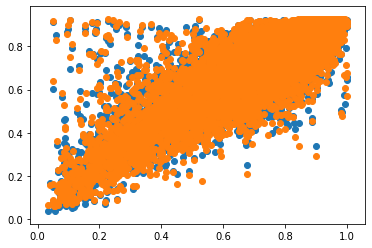

In [27]:
plt.scatter(cnn_mse["y"], cnn_mse["y_hat"])
plt.scatter(cnn_elbo["y"], cnn_elbo["y_hat"])

#### RNN+CNN

In [28]:
y_hats_mse = (np.array(rnn_mse["y_hat"])+np.array(cnn_mse["y_hat"]))/2
y_hats_elbo = (np.array(rnn_elbo["y_hat"])+np.array(cnn_elbo["y_hat"]))/2
y_hats_std_mse = (np.array(rnn_mse["y_hat_std"])+np.array(cnn_mse["y_hat_std"]))/2
y_hats_std_elbo = (np.array(rnn_elbo["y_hat_std"])+np.array(cnn_elbo["y_hat_std"]))/2

In [29]:
in_CI(cnn_mse["y"], y_hats_mse, y_hats_std_mse).mean()

0.68     0.774580
0.95     0.950959
0.997    0.986811
dtype: float64

In [30]:
in_CI(cnn_elbo["y"], y_hats_elbo, y_hats_std_elbo).mean()

0.68     0.782014
0.95     0.954796
0.997    0.987170
dtype: float64

In [31]:
spearmanr(cnn_mse["y"], y_hats_mse), spearmanr(cnn_elbo["y"], y_hats_elbo)

(SpearmanrResult(correlation=0.8514190515139344, pvalue=0.0),
 SpearmanrResult(correlation=0.8452499690002562, pvalue=0.0))

In [32]:
pearsonr(cnn_mse["y"], y_hats_mse), pearsonr(cnn_elbo["y"], y_hats_elbo)

((0.8799987770073614, 0.0), (0.875494208356998, 0.0))

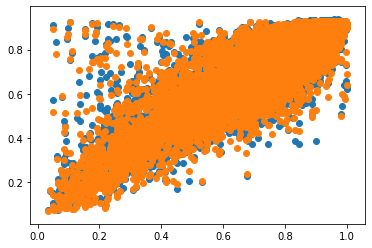

In [33]:
plt.scatter(cnn_elbo["y"], y_hats_elbo)
plt.scatter(cnn_mse["y"], y_hats_mse)

## eSpCas9

#### RNN

In [34]:
with open("../models/DeepHF/eSpCas9/rnn_mse.json", "r") as ih:
    rnn_mse = json.load(ih)
with open("../models/DeepHF/eSpCas9/rnn_elbo.json", "r") as ih:
    rnn_elbo = json.load(ih)

In [35]:
in_CI(rnn_mse["y"], rnn_mse["y_hat"], rnn_mse["y_hat_std"]).mean()

0.68     0.710191
0.95     0.945519
0.997    0.990332
dtype: float64

In [36]:
in_CI(rnn_elbo["y"], rnn_elbo["y_hat"], rnn_elbo["y_hat_std"]).mean()

0.68     0.651615
0.95     0.911283
0.997    0.979754
dtype: float64

In [37]:
pearsonr(rnn_mse["y"], rnn_mse["y_hat"]), pearsonr(rnn_elbo["y"], rnn_elbo["y_hat"])

((0.8198856125423232, 0.0), (0.8133588126611991, 0.0))

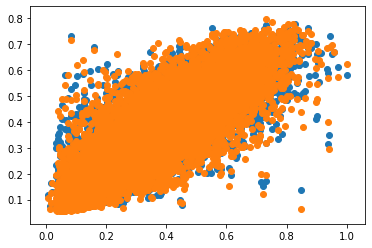

In [38]:
plt.scatter(rnn_mse["y"], rnn_mse["y_hat"])
plt.scatter(rnn_elbo["y"], rnn_elbo["y_hat"])

#### CNN

In [39]:
with open("../models/DeepHF/eSpCas9/cnn_mse.json", "r") as ih:
    cnn_mse = json.load(ih)
with open("../models/DeepHF/eSpCas9/cnn_elbo.json", "r") as ih:
    cnn_elbo = json.load(ih)

In [40]:
in_CI(cnn_mse["y"], cnn_mse["y_hat"], cnn_mse["y_hat_std"]).mean()

0.68     0.709736
0.95     0.943358
0.997    0.989308
dtype: float64

In [41]:
in_CI(cnn_elbo["y"], cnn_elbo["y_hat"], cnn_elbo["y_hat_std"]).mean()

0.68     0.712125
0.95     0.941197
0.997    0.989308
dtype: float64

In [42]:
pearsonr(cnn_mse["y"], cnn_mse["y_hat"]), pearsonr(cnn_elbo["y"], cnn_elbo["y_hat"])

((0.8172221724805209, 0.0), (0.8174710201202751, 0.0))

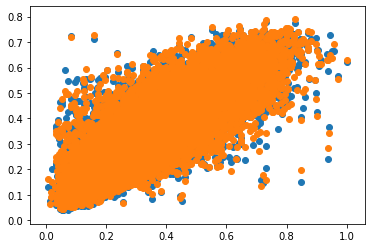

In [43]:
plt.scatter(cnn_mse["y"], cnn_mse["y_hat"])
plt.scatter(cnn_elbo["y"], cnn_elbo["y_hat"])

#### RNN+CNN

In [44]:
y_hats_mse = (np.array(rnn_mse["y_hat"])+np.array(cnn_mse["y_hat"]))/2
y_hats_elbo = (np.array(rnn_elbo["y_hat"])+np.array(cnn_elbo["y_hat"]))/2
y_hats_std_mse = (np.array(rnn_mse["y_hat_std"])+np.array(cnn_mse["y_hat_std"]))/2
y_hats_std_elbo = (np.array(rnn_elbo["y_hat_std"])+np.array(cnn_elbo["y_hat_std"]))/2

In [45]:
in_CI(cnn_mse["y"], y_hats_mse, y_hats_std_mse).mean()

0.68     0.721110
0.95     0.949386
0.997    0.990901
dtype: float64

In [46]:
in_CI(cnn_elbo["y"], y_hats_elbo, y_hats_std_elbo).mean()

0.68     0.700296
0.95     0.937216
0.997    0.988399
dtype: float64

In [47]:
spearmanr(cnn_mse["y"], y_hats_mse), spearmanr(cnn_elbo["y"], y_hats_elbo)

(SpearmanrResult(correlation=0.8314654107406529, pvalue=0.0),
 SpearmanrResult(correlation=0.8348069941298951, pvalue=0.0))

In [48]:
pearsonr(cnn_mse["y"], y_hats_mse), pearsonr(cnn_elbo["y"], y_hats_elbo)

((0.8266322962699156, 0.0), (0.8298629824796119, 0.0))

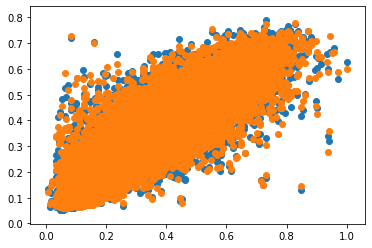

In [49]:
plt.scatter(cnn_elbo["y"], y_hats_elbo)
plt.scatter(cnn_mse["y"], y_hats_mse)

## SpCas9HF1

#### RNN

In [50]:
with open("../models/DeepHF/SpCas9HF1/rnn_mse.json", "r") as ih:
    rnn_mse = json.load(ih)
with open("../models/DeepHF/SpCas9HF1/rnn_elbo.json", "r") as ih:
    rnn_elbo = json.load(ih)

In [51]:
in_CI(rnn_mse["y"], rnn_mse["y_hat"], rnn_mse["y_hat_std"]).mean()

0.68     0.666823
0.95     0.921598
0.997    0.981952
dtype: float64

In [52]:
in_CI(rnn_elbo["y"], rnn_elbo["y_hat"], rnn_elbo["y_hat_std"]).mean()

0.68     0.645611
0.95     0.917497
0.997    0.980898
dtype: float64

In [53]:
pearsonr(rnn_mse["y"], rnn_mse["y_hat"]), pearsonr(rnn_elbo["y"], rnn_elbo["y_hat"])

((0.8480517908041455, 0.0), (0.8338176456629321, 0.0))

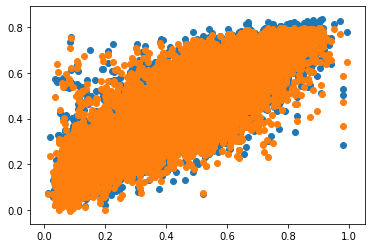

In [54]:
plt.scatter(rnn_mse["y"], rnn_mse["y_hat"])
plt.scatter(rnn_elbo["y"], rnn_elbo["y_hat"])

#### CNN

In [55]:
with open("../models/DeepHF/SpCas9HF1/cnn_mse.json", "r") as ih:
    cnn_mse = json.load(ih)
with open("../models/DeepHF/SpCas9HF1/cnn_elbo.json", "r") as ih:
    cnn_elbo = json.load(ih)

In [56]:
in_CI(cnn_mse["y"], cnn_mse["y_hat"], cnn_mse["y_hat_std"]).mean()

0.68     0.696004
0.95     0.945974
0.997    0.988515
dtype: float64

In [57]:
in_CI(cnn_elbo["y"], cnn_elbo["y_hat"], cnn_elbo["y_hat_std"]).mean()

0.68     0.689910
0.95     0.941404
0.997    0.989921
dtype: float64

In [58]:
pearsonr(cnn_mse["y"], cnn_mse["y_hat"]), pearsonr(cnn_elbo["y"], cnn_elbo["y_hat"])

((0.8468559079531153, 0.0), (0.839730657582018, 0.0))

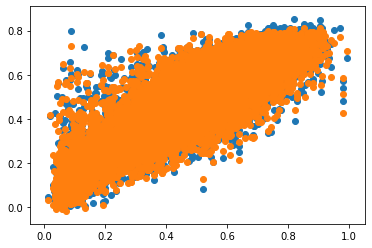

In [59]:
plt.scatter(cnn_mse["y"], cnn_mse["y_hat"])
plt.scatter(cnn_elbo["y"], cnn_elbo["y_hat"])

#### RNN+CNN

In [60]:
y_hats_mse = (np.array(rnn_mse["y_hat"])+np.array(cnn_mse["y_hat"]))/2
y_hats_elbo = (np.array(rnn_elbo["y_hat"])+np.array(cnn_elbo["y_hat"]))/2
y_hats_std_mse = (np.array(rnn_mse["y_hat_std"])+np.array(cnn_mse["y_hat_std"]))/2
y_hats_std_elbo = (np.array(rnn_elbo["y_hat_std"])+np.array(cnn_elbo["y_hat_std"]))/2

In [61]:
in_CI(cnn_mse["y"], y_hats_mse, y_hats_std_mse).mean()

0.68     0.706082
0.95     0.942224
0.997    0.988632
dtype: float64

In [62]:
in_CI(cnn_elbo["y"], y_hats_elbo, y_hats_std_elbo).mean()

0.68     0.692136
0.95     0.940701
0.997    0.988515
dtype: float64

In [63]:
spearmanr(cnn_mse["y"], y_hats_mse), spearmanr(cnn_elbo["y"], y_hats_elbo)

(SpearmanrResult(correlation=0.8449925018432339, pvalue=0.0),
 SpearmanrResult(correlation=0.837008083985476, pvalue=0.0))

In [64]:
pearsonr(cnn_mse["y"], y_hats_mse), pearsonr(cnn_elbo["y"], y_hats_elbo)

((0.860182900792762, 0.0), (0.8518379826396184, 0.0))

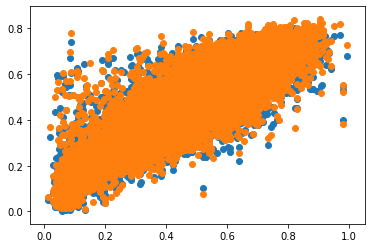

In [65]:
plt.scatter(cnn_elbo["y"], y_hats_elbo)
plt.scatter(cnn_mse["y"], y_hats_mse)

## Weissman data

In [66]:
with open("../models/Weissman/cnn.json", "r") as ih:
    weissman_elbo = json.load(ih)
with open("../models/Weissman/cnn_mse.json", "r") as ih:
    weissman_mse = json.load(ih)

In [67]:
in_CI(weissman_elbo["y"], weissman_elbo["y_hat"], weissman_elbo["y_hat_std"]).mean()

0.68     0.717230
0.95     0.915093
0.997    0.980729
dtype: float64

In [68]:
in_CI(weissman_mse["y"], weissman_mse["y_hat"], weissman_mse["y_hat_std"]).mean()

0.68     0.717611
0.95     0.912421
0.997    0.980347
dtype: float64

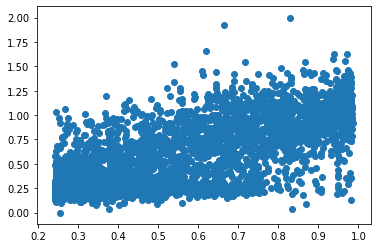

In [75]:
plt.scatter(np.array(weissman_elbo["y_hat"])*2, np.array(weissman_elbo["y"])*2)
#plt.scatter(weissman_mse["y"]*2, weissman_mse["y_hat"]*2)